## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [29]:
import numpy as np
import pandas as pd

import scipy.stats as scs

import matplotlib.pyplot as plt
import seaborn as sns



### Custom Function

In [201]:
def binning(data_series, bins): # binning  numerical features
    data_series = data_series.astype(float)
    bins_rad = pd.cut(data_series, bins)
    print(bins_rad.isna().sum())
    bins_rad = bins_rad.cat.as_ordered()
    bins_rad = bins_rad.sort_values()
    return bins_rad.value_counts()

### Gather Data

In [ ]:
data = pd.read_csv('kc_house_data.csv')

In [20]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [21]:
data.info()
#  date, sqft_basement contain string a n

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [28]:
data.describe()
#'date' 'sqft_basement' not included.

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Scrubbing the Data
Cleaning null values and placeholders

### date
Convert string values to datetime64 format (yyyy-mm-dd)

In [41]:
data.date=pd.to_datetime(data.date)

### Data Condition

binning values, playing with null values, normalizing data, standardizing data
manipulating data to fit OLS assumptions
Grouping data to create categories that might make sense for your data

#### Creating a Possible Flipped Sale Database

In [ ]:
multiple = data.id.value_counts()
len(multiple.loc[multiple > 1])
resales = len(multiple.loc[multiple > 1])
# 176, The number of time a home has been resold in the time period.
resales/ len(data.id)
# Far less then 1% of homes have been sold in the time period.
multiple = multiple.loc[multiple > 1]
multiple = multiple.to_dict()
data['num_sales'] = data.id.map(multiple)
data['num_sales'] = data['num_sales'].fillna(1)
flip = data.loc[data.num_sales > 1]
data = data.drop(columns= 'num_sales')


### Exploration (Analysis)
Initial feature review of data features. 

#### id
Unique identified for a house. 
Although not valuable for predictive modeling, the feature id homes that have been sold multiple times.

In [95]:

multiple = data.id.value_counts()
len(multiple.loc[multiple > 1])
resales = len(multiple.loc[multiple > 1])
# 176, The number of time a home has been resold in the time period.
resales/ len(data.id)
# Far less then 1% of homes have been sold in the time period.


0.008149279992591563

#### date
The date  the house was sold. The initial value was a string value. The information was convert to a date. See Data Scrubbing section for more information.



In [43]:
print(data.date.min(),'-',data.date.max())


2014-05-02 00:00:00 - 2015-05-27 00:00:00


The date range is 5/2/2014 to 5/27/2015

#### bedrooms
Number of Bedrooms/House
The initial values ranged from 1 to 33 bedrooms, but there are very fews value over 6. 


In [ ]:
data.

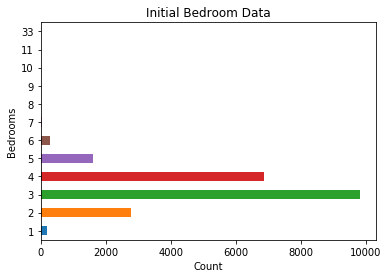

In [119]:
a=data.bedrooms.value_counts(sort=False);
a.sort_index().plot(kind= 'barh')
plt.title('Initial Bedroom Data');
plt.xlabel('Count');
plt.ylabel('Bedrooms');


#### bathrooms
Number of bathrooms/bedrooms


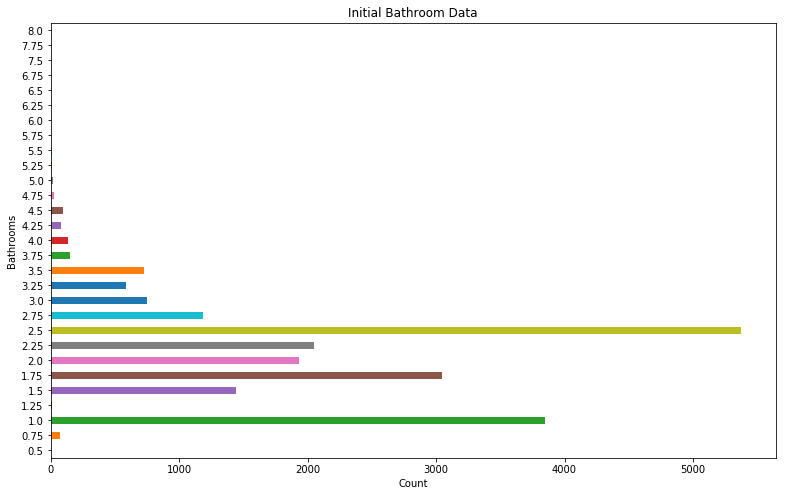

In [120]:
a=data.bathrooms.value_counts(sort=False);
plt.figure(figsize= (13, 8))
a.sort_index().plot(kind= 'barh')
plt.title('Initial Bathroom Data');
plt.xlabel('Count');
plt.ylabel('Bathrooms');

#### sqft_living
Square footage of the home 

The range is 370 sqft to 13540 sqft. 

1


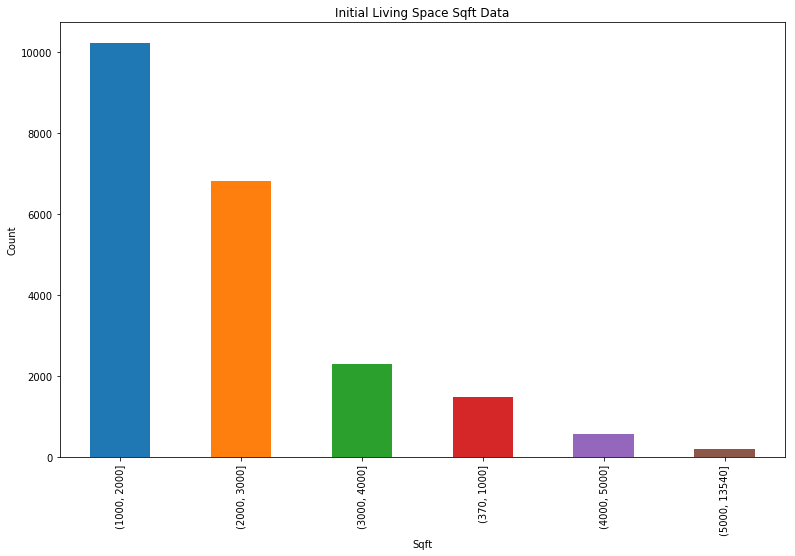

In [202]:
# binning values
bins = [370, 1000, 2000, 3000, 4000, 5000, 13540]


plt.figure(figsize= (13, 8))

binning(data.sqft_living, bins).plot(kind='bar')
plt.title('Initial Living Space Sqft Data');
plt.xlabel('Sqft');
plt.ylabel('Count');


##### sqft_lot
Square footage of the lot
The range is 520 sqft to 1,651,359 sqft.


In [152]:
np.array([.25, .5, .75])*43560

array([10890., 21780., 32670.])

1


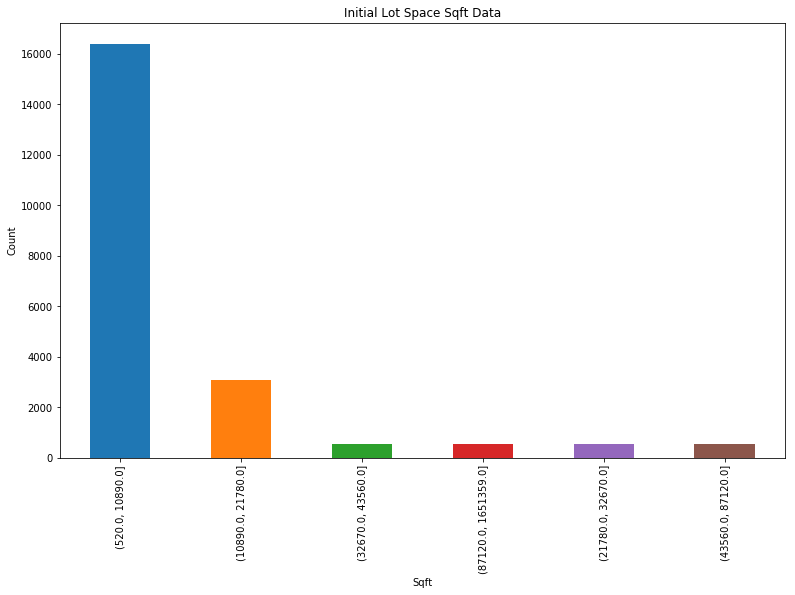

In [203]:
bins = [520, 10890., 21780., 32670., 43560,   87120, 1651359] # by arces
plt.figure(figsize= (13, 8))
binning(data.sqft_lot, bins).plot(kind='bar')
plt.title('Initial Lot Space Sqft Data');
plt.xlabel('Sqft');
plt.ylabel('Count');


#### floors
Total floors (levels) in house
The range is 1 to 3.5 floor. 

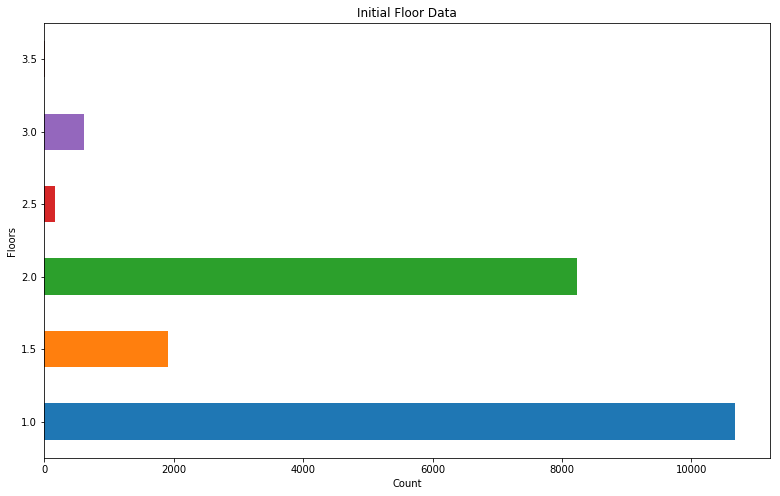

In [160]:
a=data.floors.value_counts(sort=False);
plt.figure(figsize= (13, 8))
a.sort_index().plot(kind= 'barh')
plt.title('Initial Floor Data');
plt.xlabel('Count');
plt.ylabel('Floors');

#### waterfront
House which has a view to a waterfront



In [161]:
data.waterfront.value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

#### view
Has been viewed
The range is 0 to 4.

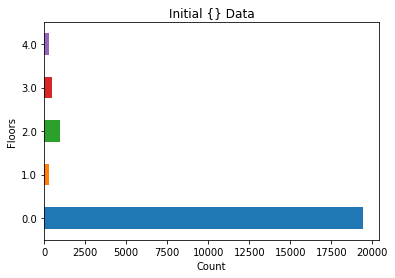

In [168]:
a = data.view.value_counts()
a.sort_index().plot(kind= 'barh')
plt.title('Initial View Data');
plt.xlabel('Count');
plt.ylabel('View');

#### condition
How good the condition is ( Overall 
The range is 1 to 5.

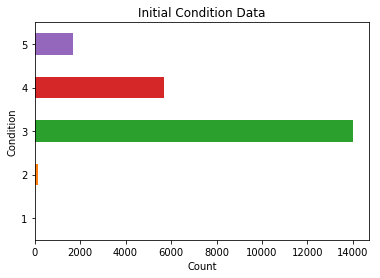

In [172]:
a = data.condition.value_counts()
a.sort_index().plot(kind= 'barh')
plt.title('Initial Condition Data');
plt.xlabel('Count');
plt.ylabel('Condition');

#### grade
overall grade given to the housing unit, based on King County grading system

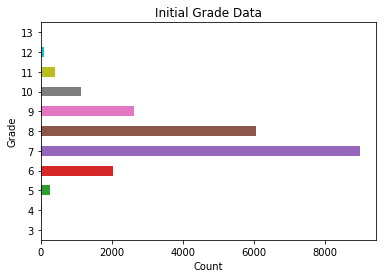

In [173]:
a = data.grade.value_counts()
a.sort_index().plot(kind= 'barh')
plt.title('Initial Grade Data');
plt.xlabel('Count');
plt.ylabel('Grade');

#### sqft_above
Square footage of house apart from basement

In [189]:
type(data.sqft_above[0])

numpy.int64

C:\Users\FlatIron_User\.conda\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


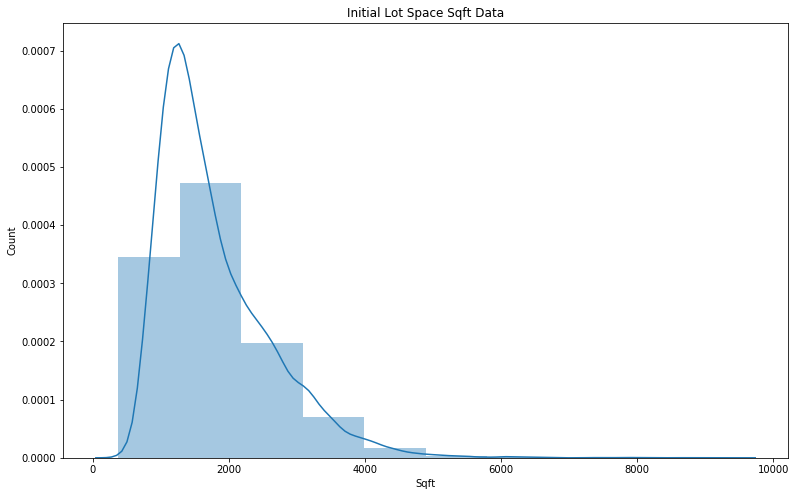

In [208]:
bins= [0, 25, 50, 75, 100, 125, 150, 175, 200, 225]
plt.figure(figsize= (13, 8))
sns.distplot(data.sqft_above, bins=10)
plt.title('Initial Lot Space Sqft Data');
plt.xlabel('Sqft');
plt.ylabel('Count');

### Modeling / Cross Validation

### Interpret